In [10]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 11 #

## Apply

In [11]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [12]:
def predict(h):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [13]:
predicted_heights = galton.apply(predict, 'midparentHeight')
predicted_heights

array([70.1       , 70.1       , 70.1       , 70.1       , 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 68.5025    , 68.5025    ,
       68.5025    , 68.5025    , 68.5025    , 68.5025    , 68.5025    ,
       66.43149606, 66.43149606, 66.43149606, 66.43149606, 66.43149606,
       66.43149606, 70.41578947, 70.41578947, 70.41578947, 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 69.18571429, 69.18571429,
       69.18571429, 69.18571429, 68.66052632, 67.63423913, 67.63423913,
       67.63423913, 67.63423913, 67.63423913, 67.63423913, 67.63423913,
       67.63423913, 67.37410714, 68.77428571, 68.77428571, 68.77428571,
       68.77428571, 68.59230769, 68.59230769, 68.59230769, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.07323944, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.05465116, 68.05465116,
       68.05465116, 68.05465116, 68.05465116, 68.05465116, 67.56276596,
       67.56276596, 67.56276596, 67.71678832, 70.41578947, 70.41

In [16]:
galton = galton.with_column('predictedHeight', predicted_heights)


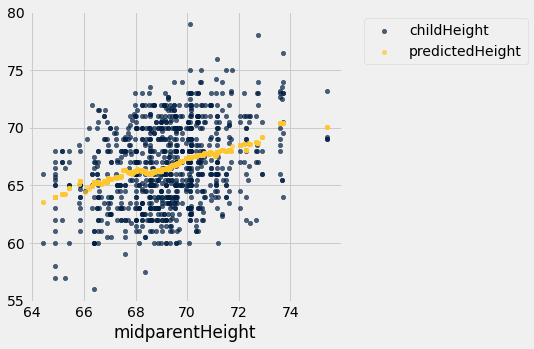

In [17]:
# Then applying scatter to midparentheight
galton.select(
    'midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

## Prediction Accuracy ##

In [18]:
#lets check how accurate our prediction is 
# by looking at the difference between the predicted height 
# and the actual height
def difference(x, y):
    return x - y

In [19]:
# us apply and difference and add to the table
pred_errs = galton.apply(difference, 'predictedHeight', 'childHeight')
pred_errs

array([-3.10000000e+00,  9.00000000e-01,  1.10000000e+00,  1.10000000e+00,
       -3.08421053e+00, -2.08421053e+00,  4.91578947e+00,  4.91578947e+00,
       -2.49750000e+00,  5.02500000e-01, -1.99750000e+00,  2.50000000e-03,
        1.50250000e+00,  4.00250000e+00,  5.50250000e+00, -5.56850394e+00,
       -2.56850394e+00, -1.56850394e+00, -6.85039370e-02,  3.93149606e+00,
        3.93149606e+00,  9.15789474e-01, -6.08421053e+00, -3.58421053e+00,
       -2.58421053e+00, -2.58421053e+00, -8.42105263e-02,  6.41578947e+00,
       -1.31428571e+00,  1.18571429e+00,  3.18571429e+00,  3.18571429e+00,
        3.16052632e+00, -6.36576087e+00, -2.36576087e+00, -3.65760870e-01,
        6.34239130e-01,  6.34239130e-01,  1.63423913e+00,  4.13423913e+00,
        4.63423913e+00,  2.37410714e+00, -2.22571429e+00,  6.77428571e+00,
        7.74285714e-01,  1.77428571e+00, -2.40769231e+00, -1.90769231e+00,
        1.89230769e+00, -3.92676056e+00, -2.42676056e+00, -2.12676056e+00,
       -2.12676056e+00, -

In [20]:
# Here is our error table
galton = galton.with_column('errors',pred_errs)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,1,male,73.2,70.1,-3.1
1,78.5,67,75.43,4,2,female,69.2,70.1,0.9
1,78.5,67,75.43,4,3,female,69,70.1,1.1
1,78.5,67,75.43,4,4,female,69,70.1,1.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,-3.08421
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,-2.08421
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,4.91579
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,4.91579
3,75,64,72.06,2,1,male,71,68.5025,-2.4975
3,75,64,72.06,2,2,female,68,68.5025,0.5025


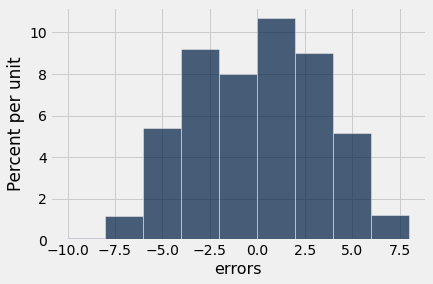

In [21]:
# Lets look at the distribution of our errors
# hint: numerical distibution
galton.hist('errors',bins=np.arange(-10,10,2))

## Lists

In [22]:
simple_list = ['hello', 7, 3.14, True]
simple_list

['hello', 7, 3.14, True]

In [23]:
my_array = make_array(1, 2, 3)

crowded_list = [my_array, 'what is going on', -10]
crowded_list

[array([1, 2, 3], dtype=int64), 'what is going on', -10]

In [24]:
Table().with_columns('Numbers', [1, 2, 3])

Numbers
1
2
3


In [25]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks

Drink,Cafe,Price


In [26]:
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


## Grouping by One Column ##

In [27]:
cones = Table.read_table('cones.csv')

In [28]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [29]:
# Group finds the catergorical distribution!
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [30]:
#Also group has optional argument that applies a function to all values in 
# categorical variable

# for example lets group by flavour and find the average of each flavor 
cones.group('Flavor', np.average)

Flavor,Color average,Price average
bubblegum,,4.75
chocolate,,5.08333
strawberry,,4.4


In [31]:
# This time drop the color column and find the min of each flavor
cones.drop('Color').group('Flavor', min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


## Grouping by one column: Survey

In [32]:
# Group allows us to 
# 1. find categorical distribution
# 2. find characteristic of each category


survey = Table.read_table('welcome_survey_v2.csv')
survey

Year,Extraversion,Number of textees,Hours of sleep
Third,4,6,4
Fourth,8,6,7
First,9,6,7
Third,2,3,6.75
Second,7,10,7
First,8,50,8
Fourth,4,5,10
Second,7,2,5
Fourth,3,7,5
Second,6,8,5.5


In [33]:
# We can find the average of the extraversion, number of textees and sleep 
# by grouping with respect to year
survey.group('Year', np.average)

Year,Extraversion average,Number of textees average,Hours of sleep average
First,5.8314,8.27326,7.12112
Fourth,5.37719,6.01754,7.13596
Fourth or above,6.33333,7.66667,7.2
Second,5.89051,7.47445,7.04623
Third,5.60837,5.71483,6.95913


In [34]:
# What if we wanted to look at the connection between extraversion
# and number of textees? 

# Lets group and find the average
by_extra = survey.group('Extraversion', np.average)
by_extra

Extraversion,Year average,Number of textees average,Hours of sleep average
1,,3.28571,6.61905
2,,4.1087,6.78804
3,,5.31788,7.01987
4,,6.44134,7.06145
5,,6.64398,7.08639
6,,6.53571,7.10714
7,,8.10484,7.10282
8,,9.5625,7.09375
9,,9.81429,7.09286
10,,10.7143,7.2619


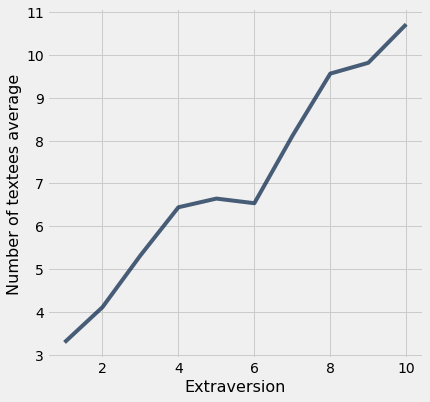

In [35]:
by_extra.select(0,2).plot('Extraversion')

## Cross-classification: grouping by two columns

In [37]:
#group method also allows us to classify individuals according to more then 
# one categorical variable
survey = Table.read_table('welcome_survey_v4.csv')

# For example lets look at the groups defined by Handedness 
# and Sleep position 

# Theres 3 possible ways to be handed
# 4 ways to sleep

survey.group(['Handedness','Sleep position']).show()

C:\Users\Abra\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Handedness,Sleep position,count
Both,On your back,4
Both,On your left side,5
Both,On your right side,7
Both,On your stomach,1
Left-handed,On your back,31
Left-handed,On your left side,27
Left-handed,On your right side,30
Left-handed,On your stomach,12
Right-handed,On your back,267
Right-handed,On your left side,342


In [38]:
#Pivot tables make it easier to work with data 
#that have been classified according to two variables

# Lets try to classify our groups again using a pivot table

survey.pivot('Sleep position', 'Handedness')


#Pivot differs from group because it organizes the resulting
#values in a grid.

Handedness,On your back,On your left side,On your right side,On your stomach
Both,4,5,7,1
Left-handed,31,27,30,12
Right-handed,267,342,397,199


In [39]:
# The optional argument allows us to apply a function to a numerical 
# variable and disply the result for each group

# lets find the average sleep for each member set in sleep position and
# handedness

survey.pivot('Sleep position', 'Handedness', 'Hours of sleep', np.average)

Handedness,On your back,On your left side,On your right side,On your stomach
Both,6.125,6.6,7.42857,6
Left-handed,7.1371,7.11111,7.03333,6.70833
Right-handed,7.1236,7.00292,7.05164,7.18342


In [45]:
#compare same data versus grouping

#first get table with only 'Handedness', 'Sleep position', 'Hours of sleep'

#then group with respect to 'Handedness', 'Sleep position' and apply 
# average with the group method

ok=survey.select('Handedness', 'Sleep position', 'Hours of sleep')

ok.group(['Handedness','Sleep position'], np.average).show()

Handedness,Sleep position,Hours of sleep average
Both,On your back,6.125
Both,On your left side,6.6
Both,On your right side,7.42857
Both,On your stomach,6
Left-handed,On your back,7.1371
Left-handed,On your left side,7.11111
Left-handed,On your right side,7.03333
Left-handed,On your stomach,6.70833
Right-handed,On your back,7.1236
Right-handed,On your left side,7.00292


## Challenge Question ##

In [46]:
sky = Table.read_table('skyscrapers_v2.csv')
sky = (sky.with_column('age', 2020 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,6
Willis Tower,steel,Chicago,442.14,46
432 Park Avenue,concrete,New York City,425.5,5


In [ ]:
# 1. For each city, what’s the tallest building for each material?










In [ ]:
# 2. For each city, what’s the height difference between the tallest 
#    steel building and the tallest concrete building?












In [ ]:
sky.select('material', 'city', 'height').group(['city', 'material'], max)

In [ ]:
sky_p = sky.pivot('material', 'city', 'height', max)
sky_p.show()

In [ ]:
sky_p = sky_p.with_column(
    'difference', 
    abs(sky_p.column('steel') - sky_p.column('concrete'))
)
sky_p

In [ ]:
sky_p.sort('difference', True)